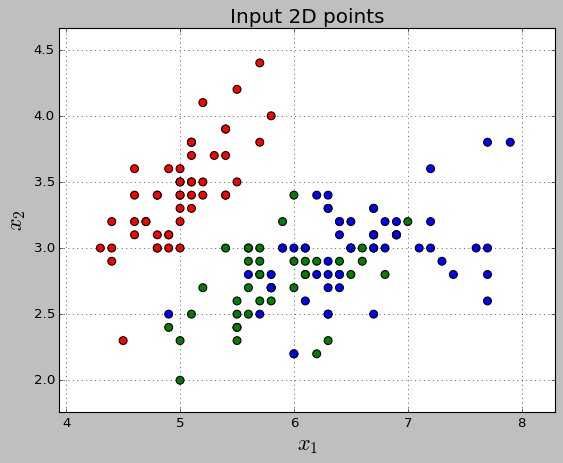

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math # for floor and ceil functions

plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

# Load Iris dataset
iris = datasets.load_iris()

# Create feature matrix
X = (iris.data)[:, 0:2]

xmin = min(X[:, 0])
xmax = max(X[:, 0])
ymin = min(X[:, 1])
ymax = max(X[:, 1])

# Enlarge x and y domains slightly
xmin = xmin-((xmax-xmin)/10)
xmax = xmax+((xmax-xmin)/10)
ymin = ymin-((ymax-ymin)/10)
ymax = ymax+((ymax-ymin)/10)

# Create target vector
y = iris.target

# Split the dataset into separate training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1, stratify=y)

# Scale features for optimal performance when using gradient descent.
# I decide NOT to scale features, since this complicates the computation of  
# decision boundaries below.
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

# One Hot Encoding of vector y
Y_train = np.eye(3)[y_train]

colormap = np.array(['r', 'g', 'b'])

def plot_scatter(X, y, colormap, path):
   plt.grid()
   plt.xlim([xmin, xmax])
   plt.ylim([ymin, ymax])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Input 2D points', size=18)
   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   #plt.savefig(path)

plot_scatter(X, y, colormap, 'image.png')

#plt.close()
#plt.clf()
#plt.cla()

In [18]:
def stable_softmax(z):
  # z is 3 x 1
  a = np.exp(z - max(z)) / np.sum(np.exp(z - max(z)))
  # a is 3 x 1
  return a

def forward_propagate(x, W, b):
  # W is 3 x 2
  # x is 2 x 1
  # b is 3 x 1
  z = np.matmul(W, x) + b
  a = stable_softmax(z)
  # z is 3 x 1
  # a is 3 x 1
  return z, a

# These would be the weights after training
W = np.array([[ 0.31, 3.95],
              [ 7.07, -0.23],
              [-6.27, -2.35]])

b = np.array([[ 1.2  ],
              [ 2.93 ],
              [-4.14 ]])

# Feed one of our samples (a red point) to our classifier
z, a = forward_propagate(X[0,:].reshape(2,1), W, b)

print(z)
print(a)
print(y[0])

[[ 16.606]
 [ 38.182]
 [-44.342]]
[[0.]
 [1.]
 [0.]]
0


[[ 0.648]
 [ 0.875]
 [-1.523]]


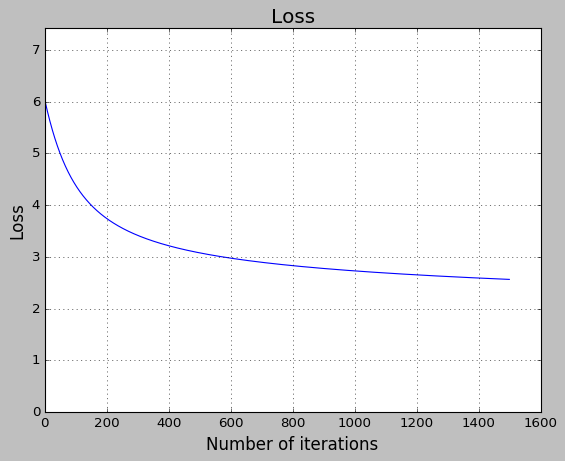

In [19]:
# Main program:

LEARNING_RATE = 0.01
NUM_EPOCHS = 1500

def get_loss(y, a):
  return -1 * np.sum(y * np.log(a))

def get_loss_numerically_stable(y, z):
   return -1 * np.sum(y * (z + (-z.max() - np.log(np.sum(np.exp(z-z.max()))))))

def get_gradients(x, z, a, y):
  da = (-y / a)

  matrix = np.matmul(a, np.ones((1, 3))) * (np.identity(3) - np.matmul(np.ones((3, 1)), a.T))
  dz = np.matmul(matrix, da)

  dW = dz * x.T
  db = dz.copy()

  return dz, dW, db

def gradient_descent(W, b, dW, db, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return W, b

# random initialization
W_initial = np.random.rand(3, 2)
W = W_initial.copy()
b = np.zeros((3, 1))

W_cache = []
b_cache = []
L_cache = []

for i in range(NUM_EPOCHS):
  dW = np.zeros(W.shape)
  db = np.zeros(b.shape)
  L = 0
  for j in range(X_train.shape[0]):
    x_j = X_train[j,:].reshape(2,1)
    y_j = Y_train[j,:].reshape(3,1)

    z_j, a_j = forward_propagate(x_j, W, b)
    loss_j = get_loss_numerically_stable(y_j, z_j)
    dZ_j, dW_j, db_j = get_gradients(x_j, z_j, a_j, y_j)

    dW += dW_j
    db += db_j
    L += loss_j

  dW *= (1.0/20)
  db *= (1.0/20)
  L *= (1.0/20)

  W, b = gradient_descent(W, b, dW, db, LEARNING_RATE)

  W_cache.append(W)
  b_cache.append(b)
  L_cache.append(L)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, max(L_cache) * 1.1])
plt.plot(L_cache)

print(b)

#plt.savefig('image.png')

#plt.close()
#plt.clf()
#plt.cla()

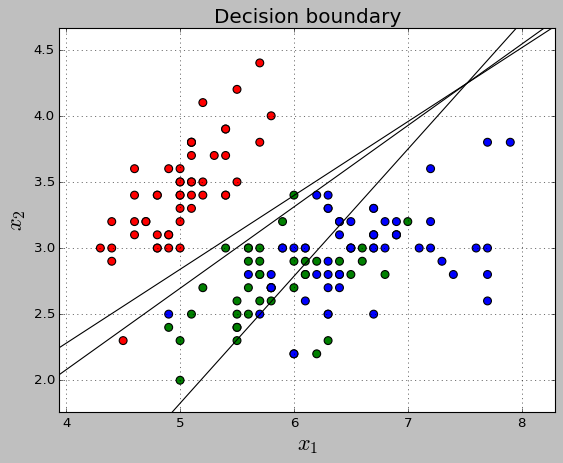

In [20]:
def plot_decision_boundary(X, Y, W, b, path):
  plt.grid()
  plt.xlim([xmin, xmax])
  plt.ylim([ymin, ymax])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary', size = 18)

  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])

  xs = np.array([xmin, xmax])
  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  plt.plot(xs, ys1, c='black')
  plt.plot(xs, ys2, c='black')
  plt.plot(xs, ys3, c='black')

  #plt.savefig(path)

plot_decision_boundary(X, Y, W, b, 'image.png')

#plt.close()
#plt.clf()
#plt.cla()

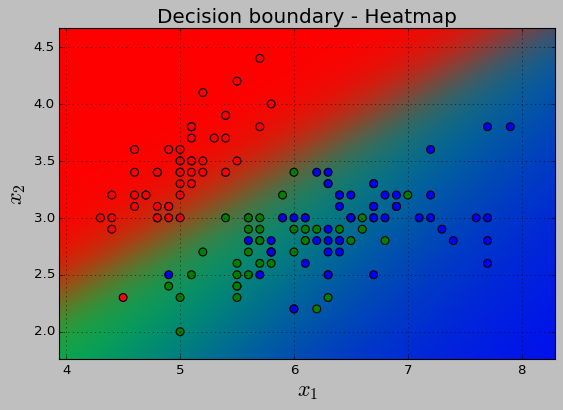

In [21]:
NX = 100
NY = 100

def plot_decision_boundary_lazy(X, Y, W, b):
  plt.grid()
  plt.xlim([xmin, xmax])
  plt.ylim([ymin, ymax])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary - Heatmap', size = 18)

  xs = np.linspace(xmin, xmax, NX)
  ys = np.linspace(ymax, ymin, NY)
  xv, yv = np.meshgrid(xs, ys)
  X_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

  A = []
  for j in range(X_fake.shape[0]):
    x_j = X_fake[j,:].reshape(2,1)
    z_j, a_j = forward_propagate(x_j, W, b)
    A.append(a_j)

  plt.imshow(np.array(A).reshape(NX, NY, 3), extent=[xmin, xmax, ymin, ymax])
  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[y])

  #plt.savefig('image.png')

plot_decision_boundary_lazy(X, Y, W_cache[-1], b_cache[-1])

#plt.close()
#plt.clf()
#plt.cla()